In [2]:
#!conda info

**List Materi :**

01. prefix dan suffix
02. Pemilihan baris (rows selection) pada Data Frame
03. Konversi tipe data String ke Numerik pada kolom Data Frame
04. Pemilihan kolom (columns selection) berdasarkan tipe data
05. Membalik urutan baris dan kolom pada Data Frame
06. Mengganti nama kolom pada Data Frame \\\
07. Menghapus (Drop) missing values (NaN) pada Data Frame \\\
08. Memeriksa kesamaan antar kolom (Series) pada Data Frame
09. Membagi data frame menjadi dua secara acak
10. Mengganti nama kolom pada Data Frame berdasarkan pola \\\
11. Seleksi kolom dan baris pada data frame menggunakan loc
12. Membentuk kolom bertipe datetime dari beberapa kolom lain pada data frame \\\
13. Konversi nilai numerik ke dalam kategori pada Data Frame
14. Menggabungkan dua pandas data frame (mergeging)
15. Memecah nilai string suatu kolom ke dalam beberapa kolom baru \\\
16. Menata ulang Data Frame dengan multiple indexes menggunakan unstack
17. Resampling pada data deret waktu (time series data)
18. Membentuk dummy Data Frame
19. Formatting tampilan Data Frame \\\
20. Menggabungkan dua data frame secara berdampingan
21. Agregasi pada Pandas Data Frame dengan agg \\\
22. Memantau penggunaan memory pada Data Frame
23. Seleksi baris pada Data Frame dengan fungsi query() \\\
24. UTC dan konversi zona waktu pada Python
25. Pengaturan tampilan pada Python Pandas
26. Membuat Data Frame dari hasil seleksi Spreadsheet \\\
27. Fungsi agregasi first dan last \\\
28. Mengenal explode dan implode List
29. Random sampling
30. Akses nilai variabel dalam fungsi query
31. Tipe data ordinal
32. Visualisasi data dengan Plotting \\\

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print(pd.__version__)
print(np.__version__)

1.5.2
1.23.5


## **01. Prefix dan Suffix pada seluruh Kolom Pandas Data Frame**

- prefix menambahkan string di depan string
- suffix menambahkan string di belakang string

In [3]:
x_rows = 5
x_cols = 5
cols = tuple('ABCDE') #untuk penamaan label kolom

#membuat table dengan isi angka random
df = pd.DataFrame(np.random.randint(1, 10, size =(x_rows, x_cols)), columns = cols)
df

,A,B,C,D,E
0,4,9,7,8,5
1,9,2,9,2,1
2,4,5,2,5,8
3,4,7,3,7,3
4,7,4,8,4,5


**prefix**

In [14]:
df.add_prefix('kolom_')

,kolom_A,kolom_B,kolom_C,kolom_D,kolom_E
0,4,6,9,9,2
1,7,6,2,4,6
2,2,1,4,4,6
3,8,9,8,1,8
4,3,4,8,7,1


**suffix**

In [15]:
df.add_suffix('_field')

,A_field,B_field,C_field,D_field,E_field
0,4,6,9,9,2
1,7,6,2,4,6
2,2,1,4,4,6
3,8,9,8,1,8
4,3,4,8,7,1


## **02. Pemilihan baris (rows selection) pada Data Frame**

In [4]:
a_rows = 11
a_cols = 6
cols = tuple('ABCDEF')

#membuat table dengan isi angka random
df = pd.DataFrame(np.random.randint(10, 20, size =(a_rows, a_cols)), columns = cols)
df

,A,B,C,D,E,F
0,13,19,17,13,19,19
1,16,18,15,10,16,10
2,12,13,17,10,16,16
3,11,19,10,16,18,17
4,15,15,16,16,18,17
5,14,19,12,18,12,18
6,16,14,18,12,11,16
7,19,18,19,14,18,18
8,17,17,13,17,10,18
9,18,19,12,17,12,11


Selection dengan fungsi **isin()**

ini sama dengan penggunaan operator logika or (|)

In [5]:
#mencari angka 12 dan 17 pada kolom A
df[df['A'].isin([12, 17])]

,A,B,C,D,E,F
2,12,13,17,10,16,16
8,17,17,13,17,10,18


Operator negasi (~) berguna untuk mencari nilai yang tidak sama

In [21]:
#mencari angka selain 12 dan 17 pada kolom A
df[~df['A'].isin([12, 17])]

,A,B,C,D,E,F
0,15,13,11,13,18,11
3,11,17,14,16,16,18
4,14,19,12,10,12,19
5,13,18,13,14,12,16
8,13,12,11,18,13,15
9,11,10,15,15,11,19
10,10,16,12,11,12,18


## **03. Konversi tipe data String ke Numerik pada kolom Data Frame**

In [4]:
data = {
    'col_a' : ['1', '2', '3', 'teks'],
    'col_b' : ['1', '2', '3', '4']
}

ds = pd.DataFrame(data)
ds

,col_a,col_b
0,1,1
1,2,2
2,3,3
3,teks,4


In [5]:
ds.info() #menggunakan ini, informasi mengenai datanya lebih lengkap

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col_a   4 non-null      object
 1   col_b   4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [6]:
ds.dtypes #jika menggunakan ini hanya menampilkan type data dari setiap kolomnya

col_a    object
col_b    object
dtype: object

Konversi tipe data dengan fungsi **astype()** pada satu kolom saja

In [18]:
# ds_1 = ds.astype({'col_b':'float'}) #int (integer), float, object
# ds_1

# ds_1.dtypes

ds['col_b'] = ds['col_b'].astype('int64') #pakai cara ini saja, tidak membuat variabel baru seperti contoh diatas.
ds

,col_a,col_b
0,1,1
1,2,2
2,3,3
3,teks,4


In [19]:
ds.dtypes

col_a    object
col_b     int64
dtype: object

Konversi tipe data numerik dengan fungsi **to_numeric()**

penggunaan fungsi ini jika kita ingin konversi data ke data numeric kekeseluruhan data frame.

In [20]:
ds.apply(pd.to_numeric, errors = 'coerce')
#kegunaan parameter coerce jika kita menemukan atau terdapat data yang tidak bisa diubah ke data numeric, data tersebut akan dianggap/diubah menjadi NaN atau dianggap sebagai missing value.

,col_a,col_b
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


## **04. Pemilihan kolom (columns selection) berdasarkan tipe data**

In [23]:
rows_x = 5
cols_y = 2
cols1 = ['bil_pecahan', 'bil_bulat']

dst = pd.DataFrame(np.random.randint(10, 20, size = (rows_x, cols_y)), columns = cols1)

dst['bil_pecahan'] = dst['bil_pecahan'].astype('float')

dst.index = pd.util.testing.makeDateIndex(rows_x, freq = 'H')
dst = dst.reset_index() #berguna untuk generate index baru berupa generate int 

dst['teks'] = list('ABCDE')

dst

,index,bil_pecahan,bil_bulat,teks
0,2000-01-01 00:00:00,19.0,10,A
1,2000-01-01 01:00:00,13.0,14,B
2,2000-01-01 02:00:00,18.0,19,C
3,2000-01-01 03:00:00,14.0,14,D
4,2000-01-01 04:00:00,16.0,19,E


In [24]:
dst.dtypes

index          datetime64[ns]
bil_pecahan           float64
bil_bulat               int32
teks                   object
dtype: object

Memilih kolom berdasarkan tipe data, numeric.

In [ ]:
dst.select_dtypes(include = 'int64')
dst.select_dtypes(include = 'float')
dst.select_dtypes(include = 'number')

Memilih kolom berdasarkan tipe data, object.

In [ ]:
dst.select_dtypes(include = 'object')

Memilih kolom berdasarkan tipe data, datetime.

In [ ]:
dst.select_dtypes(include = 'datetime')

Memilih kolom dengan kombinasi tipe data

In [ ]:
dst.select_dtypes(include = ['int', 'object'])

## **05. Membalik urutan baris dan kolom pada Data Frame**

In [43]:
b_rows = 6
b_cols = 6
cols = tuple('ABCDEF')

df = pd.DataFrame(np.random.randint(1, 10, size = (b_rows, b_cols)), columns = cols)
df

,A,B,C,D,E,F
0,4,4,2,3,1,2
1,3,6,4,7,2,5
2,5,1,2,7,8,4
3,4,3,9,7,3,4
4,9,3,9,5,3,1
5,2,6,1,8,8,3


Membalik urutan kolom

In [27]:
df. loc[:, ::-1]
# df.loc[untuk mengatur baris, untuk mengatur kolom]
# untuk menyertakan keseluruhan baris dan tidak melakukan perubahan gunakan tanda blank (:)
# -1 artinya reversing(pembalikan)

,F,E,D,C,B,A
0,4,6,1,4,5,1
1,2,9,3,9,1,7
2,6,2,2,7,3,1
3,2,2,3,3,7,3
4,8,7,2,9,1,9
5,6,2,1,3,3,5


Membalik urutan baris

In [28]:
df.loc[::-1] 
#tidak perlu menuliskan elemen ke 2 atau pada bagian kolom cukup tulis bagian baris saja

,A,B,C,D,E,F
5,5,3,3,1,2,6
4,9,1,9,2,7,8
3,3,7,3,3,2,2
2,1,3,7,2,2,6
1,7,1,9,3,9,2
0,1,5,4,1,6,4


Membalik urutan baris tanpa merubah indexnya / nomor index

In [29]:
df.loc[::-1].reset_index(drop = True)

,A,B,C,D,E,F
0,5,3,3,1,2,6
1,9,1,9,2,7,8
2,3,7,3,3,2,2
3,1,3,7,2,2,6
4,7,1,9,3,9,2
5,1,5,4,1,6,4


## **06 Mengganti nama kolom pada Data Frame**

In [30]:
x_rows = 5
x_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size = (x_rows, x_cols)), columns = cols)
df

,A,B,C,D,E
0,7,7,6,6,6
1,4,3,7,8,4
2,1,8,6,5,1
3,9,6,9,1,1
4,2,2,6,1,2


mengganti nama label kolom data frame

In [33]:
df.rename(columns = {'C':'City'})

,A,B,City,D,E
0,7,7,6,6,6
1,4,3,7,8,4
2,1,8,6,5,1
3,9,6,9,1,1
4,2,2,6,1,2


In [45]:
#contoh untuk perubahan label pada banyak kolom
df.rename(columns = {'A':'Id', 'B':'Number', 'E':'Total'})

,Id,Number,C,D,Total,F
0,4,4,2,3,1,2
1,3,6,4,7,2,5
2,5,1,2,7,8,4
3,4,3,9,7,3,4
4,9,3,9,5,3,1
5,2,6,1,8,8,3


## **07. Menghapus (Drop) missing values (NaN) pada Data Frame**

In [55]:
df = pd.util.testing.makeMissingDataframe().reset_index()
df.head()

,index,A,B,C,D
0,5bqXUidAph,1.202569,-0.659721,-0.307293,0.914691
1,zAGyLLu0AV,0.544397,-1.341075,-0.736865,1.382881
2,UFxo9QsXH0,-1.872508,NaN,-2.026592,0.861102
3,c1SybnUTiA,0.060464,-1.244139,-0.666900,0.721122
4,yNdQsf961W,-0.280099,0.387535,0.514680,NaN


In [56]:
df = df.rename(columns = {'index':'X'})
df.head()

,X,A,B,C,D
0,5bqXUidAph,1.202569,-0.659721,-0.307293,0.914691
1,zAGyLLu0AV,0.544397,-1.341075,-0.736865,1.382881
2,UFxo9QsXH0,-1.872508,NaN,-2.026592,0.861102
3,c1SybnUTiA,0.060464,-1.244139,-0.666900,0.721122
4,yNdQsf961W,-0.280099,0.387535,0.514680,NaN


In [57]:
df_backup = df.copy(deep = True)

Menghapus setiap kolom yang mengandung missing value

In [58]:
df = df.dropna(axis = 'columns')
df.head()

,X
0,5bqXUidAph
1,zAGyLLu0AV
2,UFxo9QsXH0
3,c1SybnUTiA
4,yNdQsf961W


Menghapus baris yang mengandung missing value

In [60]:
df = df_backup.copy(deep = True)
df = df.dropna(axis = 'rows')
df.head()

,X,A,B,C,D
0,5bqXUidAph,1.202569,-0.659721,-0.307293,0.914691
1,zAGyLLu0AV,0.544397,-1.341075,-0.736865,1.382881
3,c1SybnUTiA,0.060464,-1.244139,-0.666900,0.721122
5,zcUmoTGwdo,0.072360,-0.115522,-0.896742,1.184887
8,2AuSoU4h7N,2.244799,1.643130,-0.763703,0.262414


Mengecek presentase missing value tiap kolom

In [61]:
df = df_backup.copy(deep = True)
df.isna().mean()

X    0.000000
A    0.066667
B    0.100000
C    0.100000
D    0.133333
dtype: float64

Menghapus kolom yang mengandung missing value berdasarkan threshold, sama dengan menghapus kolom berdasarkan presentase missing valuenya

In [62]:
treshold = len(df) * 0.9 #menghapus missing value pada kolom yang melebihi berdasarkan persentase
df = df.dropna(thresh = treshold, axis = 'columns')
df.head()

,X,A,B,C
0,5bqXUidAph,1.202569,-0.659721,-0.307293
1,zAGyLLu0AV,0.544397,-1.341075,-0.736865
2,UFxo9QsXH0,-1.872508,NaN,-2.026592
3,c1SybnUTiA,0.060464,-1.244139,-0.666900
4,yNdQsf961W,-0.280099,0.387535,0.514680


## **08. Memeriksa kesamaan antar kolom (Series) pada Data Frame**

In [3]:
data = {
    'A' : [15, 15, 18, np.nan, 12],
    'B' : [15, 15, 18, np.nan, 12]
}

df = pd.DataFrame(data)
df

,A,B
0,15.0,15.0
1,15.0,15.0
2,18.0,18.0
3,NaN,NaN
4,12.0,12.0


Mengenal Pandas Series
- Pada dasarnya Series adalah kolom
- Setiap data frame terdiri dari series

In [4]:
df['A']

0    15.0
1    15.0
2    18.0
3     NaN
4    12.0
Name: A, dtype: float64

In [6]:
type(df['A'])

pandas.core.series.Series

In [7]:
type(df)

pandas.core.frame.DataFrame

In [9]:
#mengecek persamaan nilai pada kolom atau data frame
df['A'].equals(df['B'])

True

## **09. Membagi data frame menjadi dua secara acak**

In [3]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size = (n_rows, n_cols)), columns = cols)

df

,A,B,C,D,E
0,4,7,2,8,9
1,6,4,4,9,3
2,1,6,1,7,1
3,9,9,7,3,5
4,6,6,7,4,8
5,9,9,9,8,4
6,7,4,6,1,6
7,7,8,7,6,4
8,1,4,1,9,5
9,3,3,1,3,9


In [4]:
df.shape

(10, 5)

In [5]:
proporsi = 0.7 #mengambil 70% dari data frame
df_1 = df.sample(frac = proporsi)
df_2 = df.drop(df_1.index)

print(f'df_1 shape : {df_1.shape}')
print(f'df_2 shape : {df_2.shape}')

df_1 shape : (7, 5)
df_2 shape : (3, 5)


In [6]:
df_1 #hasil secara random 70%

,A,B,C,D,E
6,7,4,6,1,6
2,1,6,1,7,1
9,3,3,1,3,9
0,4,7,2,8,9
4,6,6,7,4,8
7,7,8,7,6,4
3,9,9,7,3,5


In [7]:
df_2 #hasil secara random 30%

,A,B,C,D,E
1,6,4,4,9,3
5,9,9,9,8,4
8,1,4,1,9,5


## **10. Mengganti nama kolom pada Data Frame berdasarkan pola**

In [ ]:
#berikut code untuk mengganti nama kolom

#mengganti spasi dengan _
df.columns = df.columns.str.replace(' ', '_').str.lower() #menggunakan lowercase untuk membuat semua menjadi huruf kecil.
df.head()

In [ ]:
#Memangkas kelebihan spasi di kanan/kiri nama kolom dengan str.strip()

#REKOMENDASI LANGSUNG SAJA MENGGUNAKAN CODE INI
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df.head()

## **11. Seleksi kolom dan baris pada data frame menggunakan loc**

In [9]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size =(n_rows, n_cols)), columns = cols)
df

,A,B,C,D,E
0,2,14,12,16,10
1,6,6,8,15,19
2,6,10,2,2,13
3,10,7,12,15,1
4,11,8,10,10,10
5,2,10,11,16,18
6,6,9,19,7,12
7,19,1,1,14,6
8,11,6,15,9,9
9,3,5,10,19,8


Seleksi kolom dan baris menggunakan loc

In [10]:
#bagian kurung pertama untuk mengatur baris, bagian kurung kedua untuk kolom.

#bacanya jadi = kita ingin menampilkan baris 0,3,4 dan kolom B dan E
df.loc[[0, 3, 4], ['B', 'E']] 

,B,E
0,14,10
3,7,1
4,8,10


Seleksi baris dengan kondisi

In [13]:
df.loc[df['B'] > 5, ['B', 'D', 'E']]

,B,D,E
0,14,16,10
1,6,15,19
2,10,2,13
3,7,15,1
4,8,10,10
5,10,16,18
6,9,7,12
8,6,9,9


Slicing data frame dengan loc

In [16]:
df.loc[4:6, 'B':'D']

,B,C,D
4,8,10,10
5,10,11,16
6,9,19,7


## **12. Membentuk kolom bertipe datetime dari beberapa kolom lain pada data frame**

In [4]:
data = {
    'day' : [1, 6, 8, 14, 22],
    'month' : [1, 2, 6, 10, 12],
    'year' : [2018, 2019, 2020, 2021, 2022]
}

df = pd.DataFrame(data)
df

,day,month,year
0,1,1,2018
1,6,2,2019
2,8,6,2020
3,14,10,2021
4,22,12,2022


In [10]:
df['penanggalan'] = pd.to_datetime(df[['day', 'month', 'year']])
df

,day,month,year,penanggalan
0,1,1,2018,2018-01-01
1,6,2,2019,2019-02-06
2,8,6,2020,2020-06-08
3,14,10,2021,2021-10-14
4,22,12,2022,2022-12-22


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          5 non-null      int64         
 1   month        5 non-null      int64         
 2   year         5 non-null      int64         
 3   penanggalan  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 288.0 bytes


## **13. Konversi nilai numerik ke dalam kategori pada Data Frame**

In [20]:
n_rows = 10
n_cols = 1
cols = ('usia', )

df = pd.DataFrame(np.random.randint(1, 99, size = (n_rows, n_cols)), columns = cols)
df

,usia
0,62
1,85
2,49
3,34
4,93
5,14
6,84
7,80
8,77
9,10


Mengelompokkan nilai numerik manjadi beberapa kategori menggunakan **cut()**

In [21]:
df['Kategori usia'] = pd.cut(df['usia'], 
    bins = [1, 18, 65, 99],
    labels = ['anak-anak', 'dewasa', 'Tua'])
df

,usia,Kategori usia
0,62,dewasa
1,85,Tua
2,49,dewasa
3,34,dewasa
4,93,Tua
5,14,anak-anak
6,84,Tua
7,80,Tua
8,77,Tua
9,10,anak-anak


## **14. Menggabungkan dua pandas data frame (mergeging)**

In [24]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)), columns = cols)
df

,A,B,C,D,E
0,14,3,3,1,13
1,17,18,9,1,3
2,3,17,7,19,6
3,3,12,5,14,17
4,1,14,10,6,16


In [25]:
df1 = df.copy(deep = True)
df1 = df1.drop([1, 4])
df1 

,A,B,C,D,E
0,14,3,3,1,13
2,3,17,7,19,6
3,3,12,5,14,17


In [26]:
df2 = df.copy(deep = True)
df2 = df2.drop([0, 3])
df2

,A,B,C,D,E
1,17,18,9,1,3
2,3,17,7,19,6
4,1,14,10,6,16


In [27]:
#pada penggunaan 'inner' akan menggabungkan 2 buah data frame yang ada pada kedua data frame sumbernya (yang sama akan ditampilkan), lalu akan menambilkan index yang baru

df_inner = pd.merge(df1, df2, how = 'inner')
df_inner

,A,B,C,D,E
0,3,17,7,19,6


In [29]:
#pada penggunaan 'outer' akan menggabungkan kedua data frame namun akan menghapus data yang duplikasi
#ini yang sering digunakan pada real job.

df_outer = pd.merge(df1, df2, how = 'outer')
df_outer

,A,B,C,D,E
0,14,3,3,1,13
1,3,17,7,19,6
2,3,12,5,14,17
3,17,18,9,1,3
4,1,14,10,6,16


## **15. Memecah nilai string suatu kolom ke dalam beberapa kolom baru**

In [12]:
data = {
    'nama' : ['Budi Yoso', 'Dudi Anduk', 'Ruri Asri', 'Andi Setio'],
    'tempat_tinggal' : ['Surabaya, Jatim', 'Depok, Jabar', 'Lombok, NTT', 'Bandung, Jabar']
}

df = pd.DataFrame(data)
df

,nama,tempat_tinggal
0,Budi Yoso,"Surabaya, Jatim"
1,Dudi Anduk,"Depok, Jabar"
2,Ruri Asri,"Lombok, NTT"
3,Andi Setio,"Bandung, Jabar"


In [13]:
df[['nama_depan', 'nama_belakang']] = df['nama'].str.split(' ', expand = True)
df

,nama,tempat_tinggal,nama_depan,nama_belakang
0,Budi Yoso,"Surabaya, Jatim",Budi,Yoso
1,Dudi Anduk,"Depok, Jabar",Dudi,Anduk
2,Ruri Asri,"Lombok, NTT",Ruri,Asri
3,Andi Setio,"Bandung, Jabar",Andi,Setio


In [14]:
df[['kota', 'provinsi']] = df['tempat_tinggal'].str.split(',', expand = True)
df

,nama,tempat_tinggal,nama_depan,nama_belakang,kota,provinsi
0,Budi Yoso,"Surabaya, Jatim",Budi,Yoso,Surabaya,Jatim
1,Dudi Anduk,"Depok, Jabar",Dudi,Anduk,Depok,Jabar
2,Ruri Asri,"Lombok, NTT",Ruri,Asri,Lombok,NTT
3,Andi Setio,"Bandung, Jabar",Andi,Setio,Bandung,Jabar


## **16. Menata ulang Data Frame dengan multiple indexes menggunakan unstack**

In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
#merubah label kolom menjadi lowercase
df.columns = df.columns.str.lower()
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:

df.groupby(['sex', 'pclass'])['survived'].mean().to_frame()

survived
sex    pclass          
female 1            1.0
       2            1.0
       3            1.0
male   1            0.0
       2            0.0
       3            0.0

Menata ulang data frame dengan multiple indexes dengan menggunakan fungsi **unstack()**

In [17]:

df.groupby(['sex', 'pclass'])['survived'].mean().unstack()

pclass,1,2,3
sex,,,
female,1.0,1.0,1.0
male,0.0,0.0,0.0


## **17. Resampling pada data deret waktu (time series data)**

In [18]:
x_rows = 365 * 24
x_cols = 2
cols = ['col1', 'col2']

df = pd.DataFrame(np.random.randint(1, 20, size = (x_rows, x_cols)), columns = cols)

df.index = pd.util.testing.makeDateIndex(x_rows, freq = 'H')
df

,col1,col2
2000-01-01 00:00:00,18,13
2000-01-01 01:00:00,15,18
2000-01-01 02:00:00,4,18
2000-01-01 03:00:00,7,14
2000-01-01 04:00:00,14,18
...,...,...
2000-12-30 19:00:00,11,17
2000-12-30 20:00:00,1,3
2000-12-30 21:00:00,14,7
2000-12-30 22:00:00,16,11


Resampling data dengan interval monthly / daily / week dengan fungsi **resample()**

In [22]:
# M per bulan
# W per minggu
# D per hari
# H per jam

df.resample('M')['col1'].sum().to_frame()

,col1
2000-01-31,7428
2000-02-29,7005
2000-03-31,7375
2000-04-30,7121
2000-05-31,7233
2000-06-30,7289
2000-07-31,7432
2000-08-31,7799
2000-09-30,7367
2000-10-31,7538


## **18. Membentuk dummy Data Frame**

Ada 3 cara membuat Dummy Data Frame

1. Membentuk data frame dari Dictionary

In [24]:
pd.DataFrame({
    'col1' : [1, 2, 3 , 4],
    'col2' : [5, 6, 7, 8]
})

,col1,col2
0,1,5
1,2,6
2,3,7
3,4,8


2. Membentuk data frame dari Numpy Array

In [27]:
x_rows = 5
x_cols = 3

arr = np.random.randint(1, 20, size = (x_rows, x_cols))
arr

array([[ 3,  5,  9],
       [ 9, 14,  6],
       [19,  3,  7],
       [17,  3,  1],
       [16,  6,  7]])

In [28]:
pd.DataFrame(arr, columns = tuple('ABC'))

,A,B,C
0,3,5,9
1,9,14,6
2,19,3,7
3,17,3,1
4,16,6,7


3. Membentuk data frame dengan **pandas.util.testing**

In [31]:
pd.util.testing.makeDataFrame().head(8)

,A,B,C,D
vPdTUa1kzD,0.141747,0.412558,-0.441676,-0.140150
BZ3BZ48eRG,0.563054,-1.789776,-0.007490,0.107055
4eN6DH987x,1.034158,-0.943772,1.614475,-0.008623
Q4SUqLivh8,2.242719,0.497058,-0.008063,0.329936
bLy14mKutA,-1.007341,1.072224,0.666645,0.562007
JLx0yNV7Ri,-0.398035,1.143588,1.449051,-0.225977
B27V9gxj0W,-0.440635,-1.041985,-0.199729,-0.087594
3sgKMiUoOn,-1.396330,-0.000253,-1.081950,-0.247456


In [33]:
pd.util.testing.makeMixedDataFrame().head(8)

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [34]:
pd.util.testing.makeTimeDataFrame().head(8)

,A,B,C,D
2000-01-03,0.728689,0.789360,-0.531598,-0.452183
2000-01-04,0.592155,-1.891381,0.206328,-0.196515
2000-01-05,1.434144,0.367116,-1.019887,-1.538008
2000-01-06,-0.488945,0.849264,-0.874106,0.572826
2000-01-07,-0.040489,0.793795,-0.333296,0.908874
2000-01-10,2.116481,1.241404,-1.855620,-0.032127
2000-01-11,-0.227683,-1.148516,1.684799,0.352925
2000-01-12,0.498479,1.303941,-0.569212,0.197239


In [35]:
pd.util.testing.makeMissingDataframe().head(8)

,A,B,C,D
3qgFmeYaz7,-0.511247,-0.614234,1.075300,-1.080885
UCDf8eZFil,0.305343,0.274520,0.181359,-0.553245
P2NtgTbSzx,0.212507,1.615332,-0.681757,-0.018492
yMgeYcv8d1,NaN,-0.067052,-0.075695,-0.291600
AAkdfIMRW4,-0.791293,-0.207871,1.331792,0.981419
uQMjvLu78F,0.328047,-1.675750,2.446910,-1.514387
aQzPAgUj0o,-0.068769,-0.593011,0.657376,-1.680019
14yTeDwS2h,0.175182,-0.679910,1.822142,NaN


## **19. Formatting tampilan Data Frame**

In [12]:
n_rows = 5
n_cols = 2
cols = ['omset', 'operasional']

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)), columns = cols)
df

,omset,operasional
0,16,12
1,17,9
2,12,10
3,3,2
4,10,11


In [13]:
df['omset'] = df['omset'] * 100_000
df['operasional'] = df['operasional'] * 10_000
df

,omset,operasional
0,1600000,120000
1,1700000,90000
2,1200000,100000
3,300000,20000
4,1000000,110000


In [14]:
df.index = pd.util.testing.makeDateIndex(n_rows, freq ='D')
df = df.reset_index()
df = df.rename(columns = {'index' : 'tanggal'})
df

,tanggal,omset,operasional
0,2000-01-01,1600000,120000
1,2000-01-02,1700000,90000
2,2000-01-03,1200000,100000
3,2000-01-04,300000,20000
4,2000-01-05,1000000,110000


Melakukan formating tampilan data frame

In [22]:
formatnya = { #dalam performatan tidak urut seperti tabel tidak masalah, bisa acak.
    'tanggal' : '{:%d/%m/%y}', #mengubah format ke day/month/year
    'operasional' : 'Rp {:.2f}', #{:.2f} artinya ,00 kita menyertakan 2 digit extra dibelakang koma dalam hal ini nilainya ,00
    'omset' : 'Rp {:.2f}'
}

laporan = df.style.format(formatnya)
laporan

,tanggal,omset,operasional
0,01/01/00,Rp 1600000.00,Rp 120000.00
1,02/01/00,Rp 1700000.00,Rp 90000.00
2,03/01/00,Rp 1200000.00,Rp 100000.00
3,04/01/00,Rp 300000.00,Rp 20000.00
4,05/01/00,Rp 1000000.00,Rp 110000.00


In [25]:
type(laporan) #berubah tidak lagi menjadi data frame melainkan menjadi styler

pandas.io.formats.style.Styler

In [28]:
laporan.hide_index() #menghilangkan indexnya

tanggal,omset,operasional
01/01/00,Rp 1600000.00,Rp 120000.00
02/01/00,Rp 1700000.00,Rp 90000.00
03/01/00,Rp 1200000.00,Rp 100000.00
04/01/00,Rp 300000.00,Rp 20000.00
05/01/00,Rp 1000000.00,Rp 110000.00


In [35]:
#memberi judul
laporan.set_caption('Data omset & operasional')

#mewarnai / membedakan data
laporan.highlight_min('omset', color = 'yellow')
laporan.highlight_max('omset', color = 'blue')

laporan.highlight_min('operasional', color = 'green')
laporan.highlight_max('operasional', color = 'red')

tanggal,omset,operasional
01/01/00,Rp 1600000.00,Rp 120000.00
02/01/00,Rp 1700000.00,Rp 90000.00
03/01/00,Rp 1200000.00,Rp 100000.00
04/01/00,Rp 300000.00,Rp 20000.00
05/01/00,Rp 1000000.00,Rp 110000.00


## **20. Menggabungkan (merge) dua data frame secara berdampingan**

In [36]:
d1 = {
    'col1' : [1, 2, 3],
    'col2' : [12, 18, 22]
}

df1 = pd.DataFrame(d1)
df1

,col1,col2
0,1,12
1,2,18
2,3,22


In [39]:
d2 = {
    'col3' : [8, 4, 2],
    'col4' : [23, 28, 30]
}

df2 = pd.DataFrame(d2)
df2

,col3,col4
0,8,23
1,4,28
2,2,30


Merge 2 datanya secara berdampingan

In [40]:
df = pd.merge(df1, df2, left_index = True, right_index = True)
df

,col1,col2,col3,col4
0,1,12,8,23
1,2,18,4,28
2,3,22,2,30


## **21. Agregasi pada Pandas Data Frame dengan agg**

In [43]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Mengenal **groupby()** dan fungsi agregasi

In [45]:
df.groupby('Species')['PetalLengthCm'].count().to_frame()

,PetalLengthCm
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [46]:
df.groupby('Species')['PetalLengthCm'].mean().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [48]:
df.groupby('Species')['PetalLengthCm'].median().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


Agregasi dengan **agg()**

In [49]:
df.groupby('Species')['PetalLengthCm'].agg(['count', 'mean', 'median'])

,count,mean,median
Species,,,
Iris-setosa,50,1.464,1.50
Iris-versicolor,50,4.260,4.35
Iris-virginica,50,5.552,5.55


Agregasi dengan **describe()**

In [51]:
#untuk menampilkan descriptiv statistic
df.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


## **22. Memantau penggunaan memory pada Data Frame**

In [52]:
df_titanic = pd.read_csv('titanic.csv')
df_iris = pd.read_csv('Iris.csv')

Memantau penggunaan memory suatu data frame

In [53]:
df_titanic.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 148.1 KB


In [54]:
df_iris.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


Memantau penggunaan memory untuk setiap kolom data frame

In [55]:
df_titanic.memory_usage(deep = True)

Index            128
PassengerId     3344
Survived        3344
Pclass          3344
Name           35314
Sex            25802
Age             3344
SibSp           3344
Parch           3344
Ticket         26700
Fare            3344
Cabin          16022
Embarked       24244
dtype: int64

In [56]:
df_iris.memory_usage(deep = True)

Index              128
Id                1200
SepalLengthCm     1200
SepalWidthCm      1200
PetalLengthCm     1200
PetalWidthCm      1200
Species          10550
dtype: int64

## **23. Seleksi baris pada Data Frame dengan fungsi query()**

In [3]:
x = {
    'kolomsatu' : [1, 2, 3, 4, 5],
    'kolom dua' : [12, 18, 22, 25, 32]
}

df = pd.DataFrame(x)
df

,kolomsatu,kolom dua
0,1,12
1,2,18
2,3,22
3,4,25
4,5,32


Seleksi baris dengan **query()**

In [4]:
df.query('kolomsatu > 2')

,kolomsatu,kolom dua
2,3,22
3,4,25
4,5,32


In [8]:
df.query(' `kolom dua` >= 18') #jika dihadapkan dengan label kolom menggunakan spasi. maka, cukup apit label tsb dengan karakter bactic

,kolomsatu,kolom dua
1,2,18
2,3,22
3,4,25
4,5,32


## **24. UTC dan konversi zona waktu pada Python**

In [28]:
#s = pd.Series(range(1675175260, 1675175260, 3600)) # 1675175260 adalah Epoch Time
#s = pd.to_datetime(s, unit = 's')
#s.head() 

#error seharusnya muncul list keterangan waktu

Series([], dtype: datetime64[ns])

Pengaturan zona waktu

In [23]:
#s = s.dt.tz_localize('UTC')
#s.head()

Series([], dtype: datetime64[ns, UTC])

In [24]:
#s = s.dt.tz_convert('Asia/Jakarta')
#s.head()

Series([], dtype: datetime64[ns, Asia/Jakarta])

## **25. Pengaturan tampilan (display option) pada Python Pandas**

In [ ]:
df = pd.read_csv('titanic.csv')

Pengaturan tampilan

In [34]:
pd.set_option('display.max_rows', 5) #untuk menentukan maksimal jumlah baris yang akan ditampilkan
pd.set_option('display.max_columns', 8) #untuk menentukan maksimal jumlah kolom yang akan ditampilkan
pd.set_option('display.max_colwidth', 20) #untuk mengatur jumlah karakter/hurus yang ditampilkan

df

,PassengerId,Survived,Pclass,Name,...,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",...,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. Jam...",...,363272,7.0000,NaN,S
...,...,...,...,...,...,...,...,...,...
416,1308,0,3,"Ware, Mr. Frederick",...,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. M...",...,2668,22.3583,NaN,C


In [36]:
#untuk mengubah ke pengaturan display option defaultnya

pd.reset_option('^display.', silent = True) #sertakan tanda ^ABC.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
#pd.describe_option()

## **26. Membuat Data Frame dari hasil seleksi Spreadsheet**

In [12]:
#bisa menggunakan jenis spreadsheet apapun
#copy bagian dari data pada tabel yang ingin dijadikan data frame
#lalu langsung saja run code dibawah tanpa melakukan paste
#semua bagian paling atas yang dicopy, akan menjadi label.

df = pd.read_clipboard()
df

## **27. Fungsi agregasi first dan last**

In [4]:
x = {
    'dokter' : ['Soetomo', 'Linda', 'Ani', 'Ani', 'Soetomo', 'Linda', 'Linda'],
    'pasien' : ['Rara', 'Tia', 'Luhur', 'Budi', 'Upin', 'Ipin', 'Jarjit']
}

df = pd.DataFrame(x)
df

,dokter,pasien
0,Soetomo,Rara
1,Linda,Tia
2,Ani,Luhur
3,Ani,Budi
4,Soetomo,Upin
5,Linda,Ipin
6,Linda,Jarjit


Menggunakan fungsi agregasi **first()** dan **last()**

In [5]:
df.groupby('dokter')['pasien'].count().to_frame()

,pasien
dokter,
Ani,2
Linda,3
Soetomo,2


In [9]:
#untuk menampilkan data pada baris paling utama pada setiap kelompoknya
df.groupby('dokter')['pasien'].first().to_frame()

,pasien
dokter,
Ani,Luhur
Linda,Tia
Soetomo,Rara


In [10]:
#untuk menampilkan data pada baris paling terakhir pada setiap kelompoknya
df.groupby('dokter')['pasien'].last().to_frame()

,pasien
dokter,
Ani,Budi
Linda,Jarjit
Soetomo,Upin


## **28. Mengenal explode dan implode List**

In [14]:
x = {
    'partai' : ['PDIP', 'Gerindra'],
    'anggota' : [
        ['Megawati', 'Puan', 'Jokowi', 'Ganjar Pranowo', 'Tri Risma'],
        ['Sandiaga Uno', 'Prabowo', 'Fadli Zon', 'Arif Poyuono']
    ]
}

df = pd.DataFrame(x)
df

,partai,anggota
0,PDIP,"[Megawati, Puan, Jokowi, Ganjar Pranowo, Tri R..."
1,Gerindra,"[Sandiaga Uno, Prabowo, Fadli Zon, Arif Poyuono]"


Fungsi Explode

In [16]:
#menjadikan list menjadi independent memiliki baris sendiri
df1 = df.explode('anggota')
df1

,partai,anggota
0,PDIP,Megawati
0,PDIP,Puan
0,PDIP,Jokowi
0,PDIP,Ganjar Pranowo
0,PDIP,Tri Risma
1,Gerindra,Sandiaga Uno
1,Gerindra,Prabowo
1,Gerindra,Fadli Zon
1,Gerindra,Arif Poyuono


Fungsi Implode

In [17]:
#data frame

y = {
    'Fraksi' : ['PDIP', 'Gerindra']
}

df2 = pd.DataFrame(y)
df2

,Fraksi
0,PDIP
1,Gerindra


In [19]:
#Implode kebalikan dari Explode
df2['implode'] = df1.groupby(df1.index)['anggota'].agg(list)
df2

,Fraksi,implode
0,PDIP,"[Megawati, Puan, Jokowi, Ganjar Pranowo, Tri R..."
1,Gerindra,"[Sandiaga Uno, Prabowo, Fadli Zon, Arif Poyuono]"


## **29. Random sampling**

In [20]:
d = {
    'col1' : [1, 2, 3, 4, 5],
    'col2' : [10, 20, 30, 40, 50]
}

df = pd.DataFrame(d)
df

,col1,col2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


Random sampling with/without replacement

In [21]:
# n = 4 jumlah baris yang akan kita sample
# replace = False berarti melakukan sampling tanpa replacement (data yang sudah di sampling dari population tidak akan kita sampling ulang)
# replace = True, kebalikan dari nilai yang False
# random_state = 0, untuk menjamin agar suatu eksperimen bisa di replikasi dengan sama persis

df.sample(n = 4, replace = False, random_state = 0)

,col1,col2
2,3,30
0,1,10
1,2,20
3,4,40


In [22]:
df.sample(n = 4, replace = True, random_state = 0)

,col1,col2
4,5,50
0,1,10
3,4,40
3,4,40


## **30. Akses nilai variabel dalam fungsi query**

In [4]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size =(n_rows, n_cols)), columns = cols)
df

,A,B,C,D,E
0,14,16,5,12,17
1,1,2,12,17,16
2,3,11,4,5,10
3,15,14,18,1,19
4,9,6,18,8,6


Akses nilai variabel dengan **query()**

In [5]:
# query() berguna untuk menyeleksi nilai pada baris

df.query('A > 8')

,A,B,C,D,E
0,14,16,5,12,17
3,15,14,18,1,19
4,9,6,18,8,6


In [7]:
ratarata = df['A'].mean()
ratarata

8.4

In [8]:
df.query('A > @ratarata')

,A,B,C,D,E
0,14,16,5,12,17
3,15,14,18,1,19
4,9,6,18,8,6


## **31. Tipe data ordinal**

In [15]:
d = {
    'pelanggan' : ['Budi', 'Dudi', 'Rara', 'Lina', 'Ada'],
    'nilai' : ['baik', 'cukup', 'buruk', 'cukup', 'sangat baik']
}

df = pd.DataFrame(d)
df

,pelanggan,nilai
0,Budi,baik
1,Dudi,cukup
2,Rara,buruk
3,Lina,cukup
4,Ada,sangat baik


In [10]:
from pandas.api.types import CategoricalDtype

In [16]:
tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'], ordered = True)

df['nilai'] = df['nilai'].astype(tingkat_kepuasan)
df

,pelanggan,nilai
0,Budi,baik
1,Dudi,cukup
2,Rara,buruk
3,Lina,cukup
4,Ada,sangat baik


In [19]:
df = df.sort_values('nilai', ascending = True)
df

,pelanggan,nilai
2,Rara,buruk
1,Dudi,cukup
3,Lina,cukup
0,Budi,baik
4,Ada,sangat baik


In [21]:
df[df['nilai'] >= 'cukup']

,pelanggan,nilai
1,Dudi,cukup
3,Lina,cukup
0,Budi,baik
4,Ada,sangat baik


## **32. Visualisasi data dengan Plotting**

In [23]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)), columns = cols)
df.head(6)

,A,B,C,D,E
0,13,9,16,18,14
1,5,18,2,17,9
2,14,4,8,16,4
3,1,10,7,1,11
4,18,9,13,10,19
5,16,19,5,13,2


Line Plot

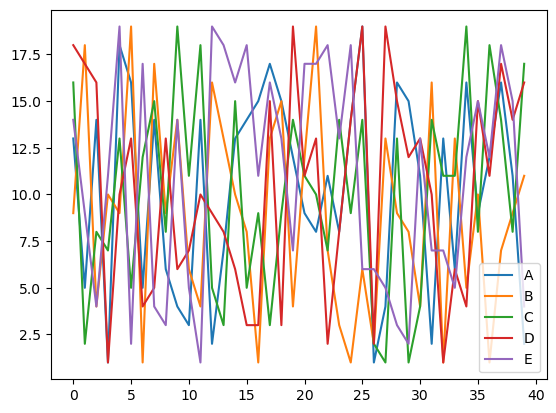

In [28]:
df.plot(kind = 'line');

## **33. Nilai kumulatif**